# Part I Query Literature:


Retrieve scholarly articles related to "Ulaanbaatar air pollution" and "Mongolia coal ban" or "Mongolia PM2.5" and "air pollution AND machine learning," and "air pollution policy" store their metadata in a pandas DataFrame.

In [1]:
import requests
import pandas as pd
from tqdm import tqdm
import time

def fetch_arxiv_data(query, max_results=100):
    base_url = 'http://export.arxiv.org/api/query?'
    search_query = f'search_query=all:{query}&start=0&max_results={max_results}'
    response = requests.get(base_url + search_query)
    if response.status_code == 200:
        return response.text
    else:
        raise Exception(f"Failed to fetch data: {response.status_code}")

def parse_arxiv_response(response):
    import xml.etree.ElementTree as ET
    root = ET.fromstring(response)
    ns = {'atom': 'http://www.w3.org/2005/Atom'}
    entries = []
    for entry in root.findall('atom:entry', ns):
        title = entry.find('atom:title', ns).text
        abstract = entry.find('atom:summary', ns).text
        published = entry.find('atom:published', ns).text
        year = published.split('-')[0]
        journal_ref = entry.find('atom:journal_ref', ns)
        venue = journal_ref.text if journal_ref is not None else 'N/A'
        entries.append({
            'title': title,
            'abstract': abstract,
            'year': int(year),
            'venue': venue
        })
    return entries

queries = ["Ulaanbaatar air pollution",
    "Mongolia coal ban",
    "Mongolia PM2.5",
    "air pollution AND machine learning",
    "air pollution policy"]

all_entries = []

for query in queries:
    print(f"Fetching data for query: {query}")
    response = fetch_arxiv_data(query)
    entries = parse_arxiv_response(response)
    all_entries.extend(entries)
    time.sleep(3)  # To respect arXiv's rate limits

df = pd.DataFrame(all_entries)
df.to_csv('literature_data.csv', index=False)
print("Data saved to literature_data.csv")
df.head()

Fetching data for query: Ulaanbaatar air pollution
Fetching data for query: Mongolia coal ban
Fetching data for query: Mongolia PM2.5
Fetching data for query: air pollution AND machine learning
Fetching data for query: air pollution policy
Data saved to literature_data.csv


,title,abstract,year,venue
0,Effects of thermal inversion induced air pollu...,"Air pollution is a threat to human health, i...",2020,N/A
1,Estimation of Air Pollution with Remote Sensin...,Air pollution is a major driver of climate c...,2021,N/A
2,Modelling Air Pollution Crises Using Multi-age...,This paper describes an agent based approach...,2019,N/A
3,Novel Regression and Least Square Support Vect...,Air pollution is the origination of particul...,2023,N/A
4,Significant Impact of Rossby Waves on Air Poll...,Air pollution is associated with human disea...,2019,N/A


In [2]:
import requests
import pandas as pd
from tqdm import tqdm
import time

def fetch_arxiv_data(query, max_results=1000):
    base_url = 'http://export.arxiv.org/api/query?'
    search_query = f'search_query=all:{query}&start=0&max_results={max_results}'
    response = requests.get(base_url + search_query)
    if response.status_code == 200:
        return response.text
    else:
        raise Exception(f"Failed to fetch data: {response.status_code}")

def parse_arxiv_response(response):
    import xml.etree.ElementTree as ET
    root = ET.fromstring(response)
    ns = {'atom': 'http://www.w3.org/2005/Atom'}
    entries = []
    for entry in root.findall('atom:entry', ns):
        title = entry.find('atom:title', ns).text
        abstract = entry.find('atom:summary', ns).text
        published = entry.find('atom:published', ns).text
        year = published.split('-')[0]
        journal_ref = entry.find('atom:journal_ref', ns)
        venue = journal_ref.text if journal_ref is not None else 'N/A'
        entries.append({
            'title': title,
            'abstract': abstract,
            'year': int(year),
            'venue': venue
        })
    return entries

# Interactive input for query
query = input("Enter your query for arXiv search (e.g., blockchain AND sustainability): ")

print(f"Fetching data for query: {query}")
response = fetch_arxiv_data(query)
entries = parse_arxiv_response(response)

# Create a DataFrame and save to CSV
df = pd.DataFrame(entries)
df.to_csv('literature_data.csv', index=False)
print("Data saved to literature_data.csv")
print("Here are the first few results:")
print(df.head())


Enter your query for arXiv search (e.g., blockchain AND sustainability): Ulaanbaatar air pollution
Fetching data for query: Ulaanbaatar air pollution
Data saved to literature_data.csv
Here are the first few results:
                                               title  \
0  Effects of thermal inversion induced air pollu...   
1  Estimation of Air Pollution with Remote Sensin...   
2  Modelling Air Pollution Crises Using Multi-age...   
3  Novel Regression and Least Square Support Vect...   
4  Significant Impact of Rossby Waves on Air Poll...   

                                            abstract  year venue  
0    Air pollution is a threat to human health, i...  2020   N/A  
1    Air pollution is a major driver of climate c...  2021   N/A  
2    This paper describes an agent based approach...  2019   N/A  
3    Air pollution is the origination of particul...  2023   N/A  
4    Air pollution is associated with human disea...  2019   N/A  


# Part II Natural Language Processing (NLP) Analysis

a. Word Cloud Generation
Visualize the most frequent words in the abstracts.


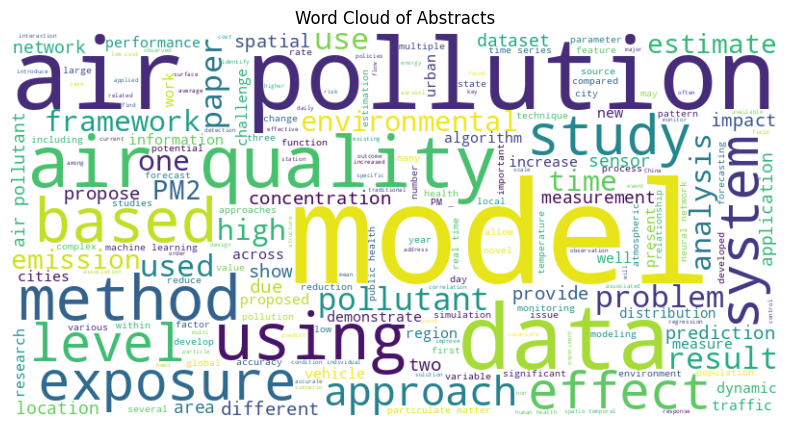

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all abstracts into a single string
text = ' '.join(df['abstract'].dropna().tolist())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Abstracts')
plt.show()


## b. Sentiment Analysis
Analyze the sentiment of each abstract using the TextBlob library.

             abstract sentiment_category  sentiment_polarity
0    This is amazing!           Positive                0.75
1  I don't like this.            Neutral                0.00
2          It's okay.           Positive                0.50
3                None                NaN                 NaN


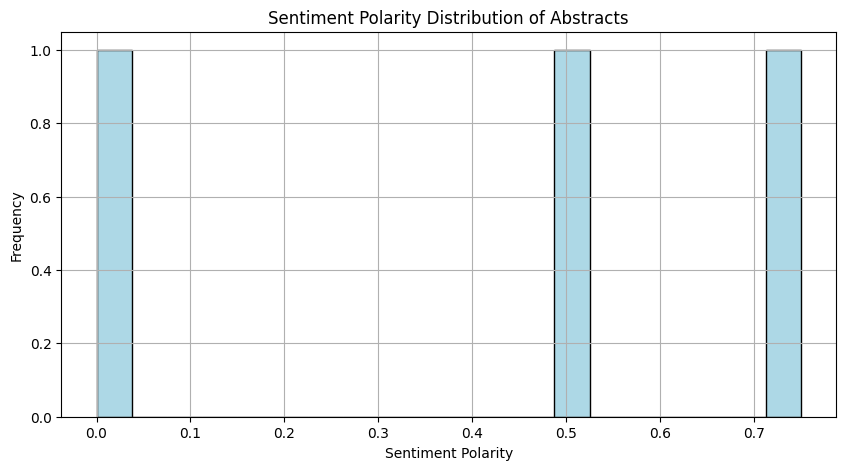

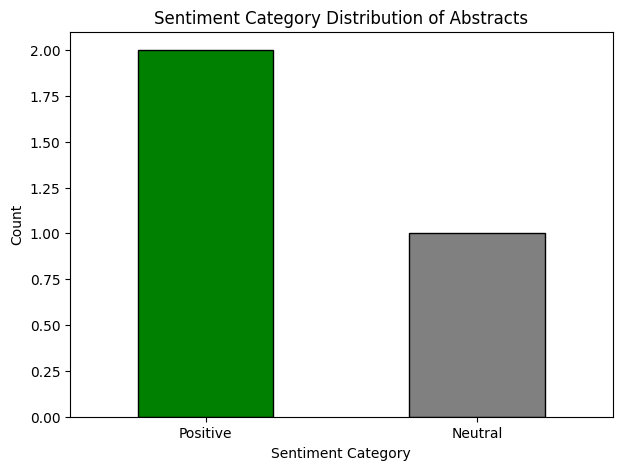

In [4]:
# Import necessary libraries
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt

# Improved sentiment analysis function
def analyze_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Example DataFrame with abstracts (Replace with your data)
data = {'abstract': ["This is amazing!", "I don't like this.", "It's okay.", None]}
df = pd.DataFrame(data)

# Apply sentiment analysis to the abstracts
df['sentiment_category'] = df['abstract'].dropna().apply(analyze_sentiment)

# Calculate sentiment polarity scores for histogram
df['sentiment_polarity'] = df['abstract'].dropna().apply(lambda x: TextBlob(x).sentiment.polarity)

# Display the results
print(df[['abstract', 'sentiment_category', 'sentiment_polarity']])

# Plot the sentiment distribution
plt.figure(figsize=(10, 5))
df['sentiment_polarity'].hist(bins=20, edgecolor='black', color='lightblue')
plt.title('Sentiment Polarity Distribution of Abstracts')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

# Plot sentiment category distribution
plt.figure(figsize=(7, 5))
df['sentiment_category'].value_counts().plot(kind='bar', color=['green', 'gray', 'red'], edgecolor='black')
plt.title('Sentiment Category Distribution of Abstracts')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


## c. Network Visualization
Visualize relationships between key terms in the abstracts using NetworkX and matplotlib.

In [49]:
import requests
import pandas as pd
from tqdm import tqdm
import time

def fetch_arxiv_data(query, max_results=100):
    base_url = 'http://export.arxiv.org/api/query?'
    search_query = f'search_query=all:{query}&start=0&max_results={max_results}'
    response = requests.get(base_url + search_query)
    if response.status_code == 200:
        return response.text
    else:
        raise Exception(f"Failed to fetch data: {response.status_code}")

def parse_arxiv_response(response):
    import xml.etree.ElementTree as ET
    root = ET.fromstring(response)
    ns = {'atom': 'http://www.w3.org/2005/Atom'}
    entries = []
    for entry in root.findall('atom:entry', ns):
        title = entry.find('atom:title', ns).text
        abstract = entry.find('atom:summary', ns).text
        published = entry.find('atom:published', ns).text
        year = published.split('-')[0]
        journal_ref = entry.find('atom:journal_ref', ns)
        venue = journal_ref.text if journal_ref is not None else 'N/A'
        entries.append({
            'title': title,
            'abstract': abstract,
            'year': int(year),
            'venue': venue
        })
    return entries

# Interactive input for query
query = input("Enter your query for arXiv search (e.g., blockchain AND sustainability): ")

print(f"Fetching data for query: {query}")
response = fetch_arxiv_data(query)
entries = parse_arxiv_response(response)

# Create a DataFrame and save to CSV
df = pd.DataFrame(entries)
df.to_csv('literature_data.csv', index=False)
print("Data saved to literature_data.csv")
print("Here are the first few results:")
print(df.head())


Enter your query for arXiv search (e.g., blockchain AND sustainability): Ulaanbaatar air pollution
Fetching data for query: Ulaanbaatar air pollution
Data saved to literature_data.csv
Here are the first few results:
                                               title  \
0  Effects of thermal inversion induced air pollu...   
1  Estimation of Air Pollution with Remote Sensin...   
2  Modelling Air Pollution Crises Using Multi-age...   
3  Novel Regression and Least Square Support Vect...   
4  Significant Impact of Rossby Waves on Air Poll...   

                                            abstract  year venue  
0    Air pollution is a threat to human health, i...  2020   N/A  
1    Air pollution is a major driver of climate c...  2021   N/A  
2    This paper describes an agent based approach...  2019   N/A  
3    Air pollution is the origination of particul...  2023   N/A  
4    Air pollution is associated with human disea...  2019   N/A  


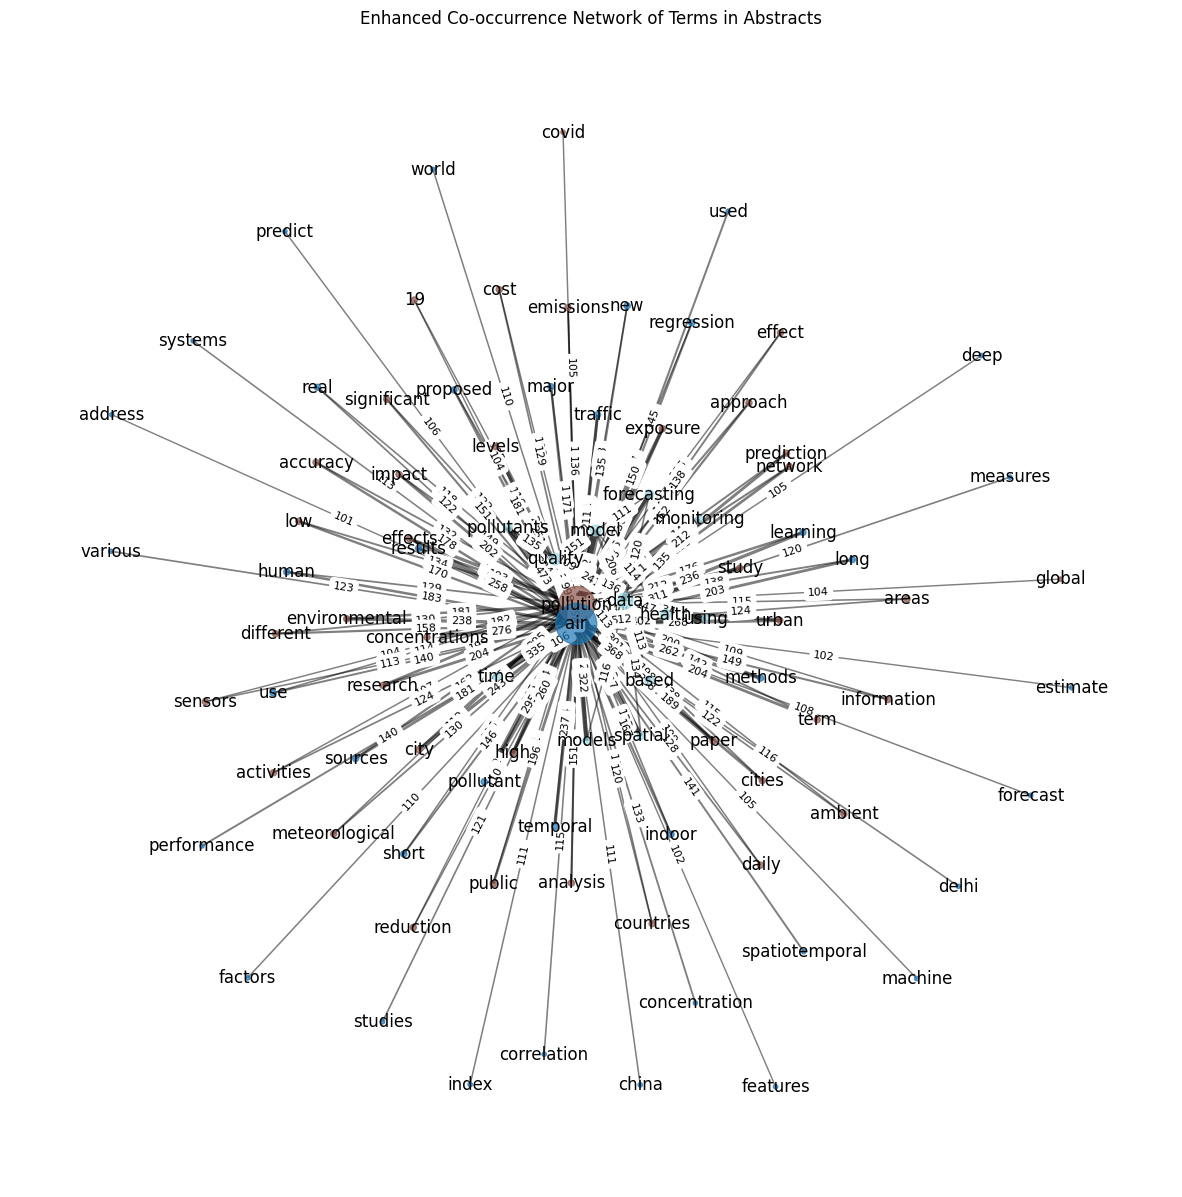

In [50]:
import networkx as nx
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
from networkx.algorithms import community

# Tokenize and create a co-occurrence matrix
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['abstract'].dropna())
Xc = (X.T * X)  # Co-occurrence matrix
Xc.setdiag(0)  # Set diagonal to zero

# Create graph from co-occurrence matrix
G = nx.from_scipy_sparse_array(Xc)

# Map indices to words
terms = vectorizer.get_feature_names_out()
mapping = {i: terms[i] for i in range(len(terms))}
G = nx.relabel_nodes(G, mapping)

# Filter edges by weight (co-occurrence count)
threshold = 100  # Adjust this threshold based on your dataset
edges = [(u, v, d) for u, v, d in G.edges(data=True) if d['weight'] > threshold]
H = nx.Graph()
H.add_edges_from(edges)

# Compute node degrees
degrees = dict(H.degree())

# Detect communities
communities = community.greedy_modularity_communities(H)
community_map = {}
for i, com in enumerate(communities):
    for name in com:
        community_map[name] = i

# Assign colors to communities
colors = [community_map[node] for node in H.nodes()]

# Draw the network
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(H, k=0.15, seed=42)  # Seed for reproducibility

# Draw nodes with sizes proportional to degree
nx.draw_networkx_nodes(H, pos,
                       node_size=[degrees[node] * 10 for node in H.nodes()],
                       node_color=colors,
                       cmap=plt.cm.tab20,
                       alpha=0.7)

# Draw edges with widths proportional to weight
nx.draw_networkx_edges(H, pos,
                       width=[d['weight'] * 0.01 for (u, v, d) in H.edges(data=True)],
                       alpha=0.5)

# Draw node labels
nx.draw_networkx_labels(H, pos, font_size=12, font_color='black')

# Draw edge labels
edge_labels = {(u, v): d['weight'] for u, v, d in H.edges(data=True)}
nx.draw_networkx_edge_labels(H, pos, edge_labels=edge_labels, font_size=8)

plt.title('Enhanced Co-occurrence Network of Terms in Abstracts')
plt.axis('off')
plt.show()


### Centrality Measures: Identify the most influential terms in the network using centrality measures.

Top terms by degree centrality: ['air', 'pollution', 'data', 'quality', 'model', 'health', 'forecasting', 'based', 'pollutants', 'time']


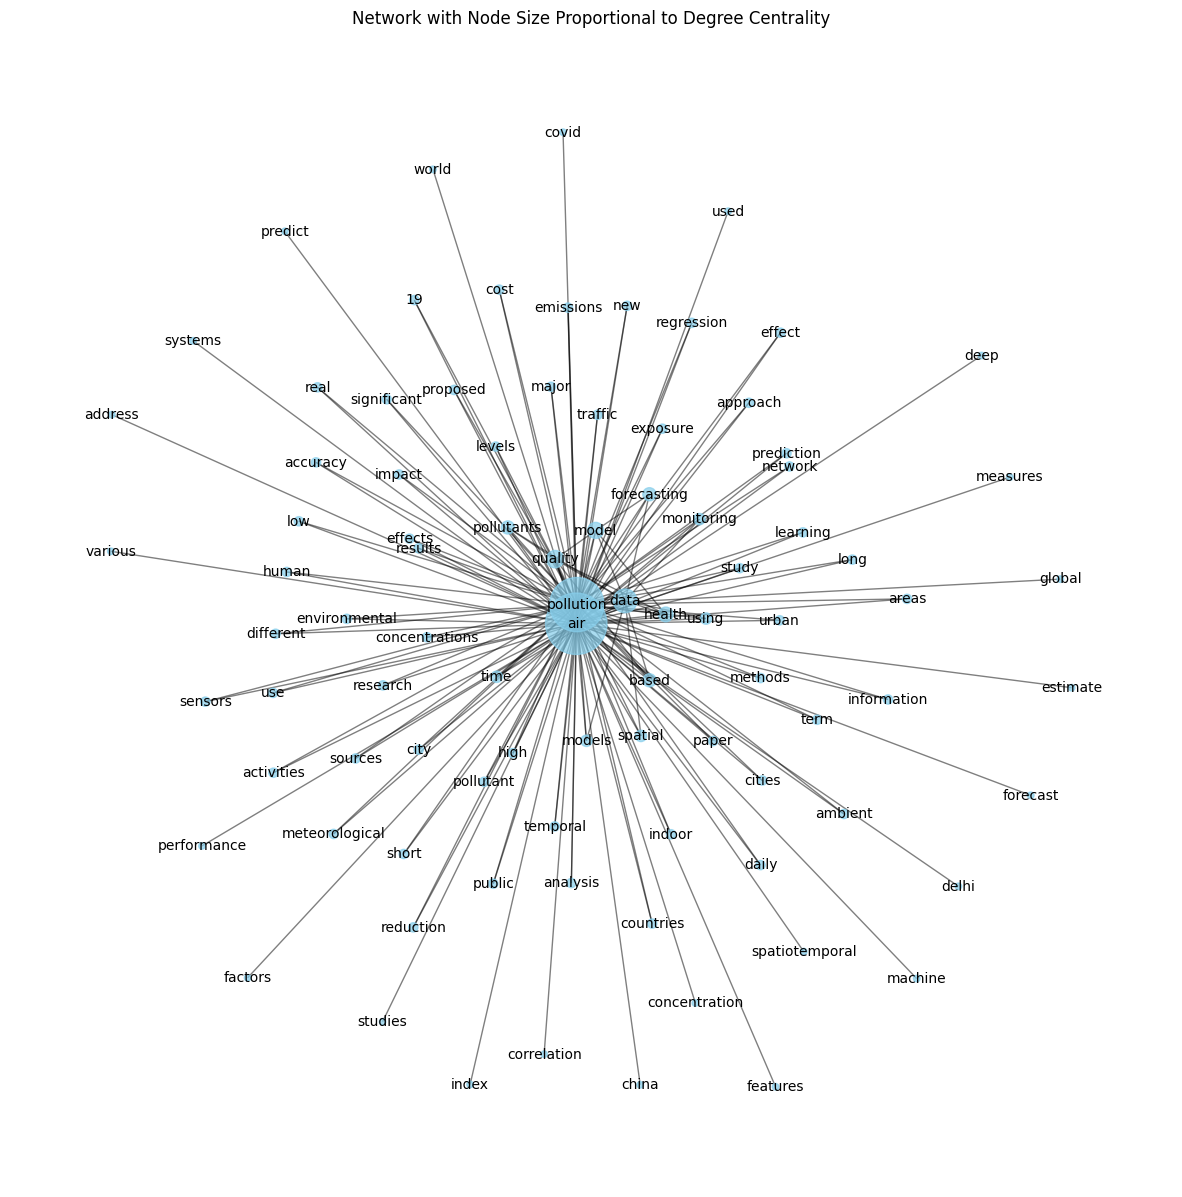

In [51]:
# Calculate different centrality measures
degree_centrality = nx.degree_centrality(H)
betweenness_centrality = nx.betweenness_centrality(H)
closeness_centrality = nx.closeness_centrality(H)

# Highlight top terms based on degree centrality
top_terms = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top terms by degree centrality:", [term for term, centrality in top_terms])

# Draw the network with node size proportional to degree centrality
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(H, k=0.15, seed=42)
nx.draw_networkx_nodes(H, pos,
                       node_size=[degree_centrality[node] * 2000 for node in H.nodes()],
                       node_color='skyblue',
                       alpha=0.7)
nx.draw_networkx_edges(H, pos, alpha=0.5)
nx.draw_networkx_labels(H, pos, font_size=10)
plt.title('Network with Node Size Proportional to Degree Centrality')
plt.axis('off')
plt.show()

### Clustering Coefficient Analysis: Investigate the local clustering of terms.

Nodes with high clustering coefficients: ['19', 'accuracy', 'activities', 'indoor', 'effect', 'low', 'sensors', 'public', 'concentrations', 'real', 'cost', 'exposure', 'reduction', 'study', 'effects', 'areas', 'traffic', 'meteorological', 'research', 'urban', 'analysis', 'significant', 'long', 'countries', 'time', 'methods', 'forecasting', 'cities', 'environmental', 'city', 'pollutant', 'different', 'network', 'paper', 'sources', 'monitoring', 'quality', 'model', 'proposed', 'based', 'ambient', 'prediction', 'approach', 'learning', 'models', 'temporal', 'spatial', 'information', 'emissions', 'major', 'term', 'short', 'results', 'using', 'daily', 'impact', 'use', 'regression', 'new', 'pollutants', 'levels', 'high', 'health', 'human']


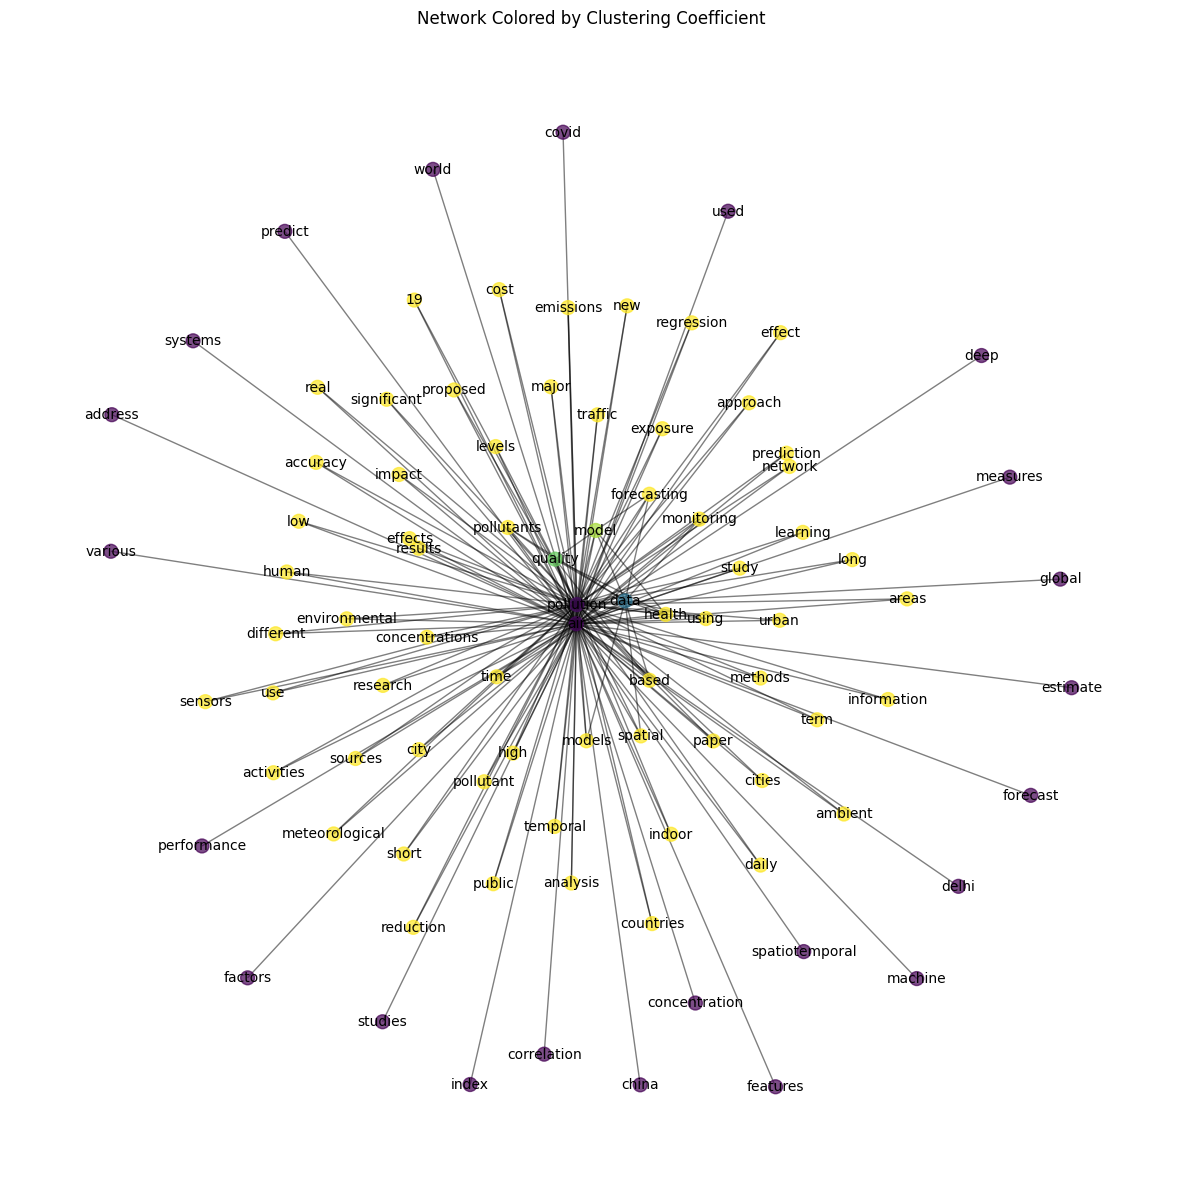

In [52]:
# Calculate the clustering coefficient for each node
clustering_coefficients = nx.clustering(H)

# Highlight nodes with high clustering coefficients
high_clustering_nodes = [node for node, coeff in clustering_coefficients.items() if coeff > 0.5]
print("Nodes with high clustering coefficients:", high_clustering_nodes)

# Draw the network with nodes colored by clustering coefficient
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(H, k=0.15, seed=42)
nx.draw_networkx_nodes(H, pos,
                       node_size=100,
                       node_color=[clustering_coefficients[node] for node in H.nodes()],
                       cmap=plt.cm.viridis,
                       alpha=0.7)
nx.draw_networkx_edges(H, pos, alpha=0.5)
nx.draw_networkx_labels(H, pos, font_size=10)
plt.title('Network Colored by Clustering Coefficient')
plt.axis('off')
plt.show()


## Publication Year Distribution: A histogram can illustrate the number of papers published each year.



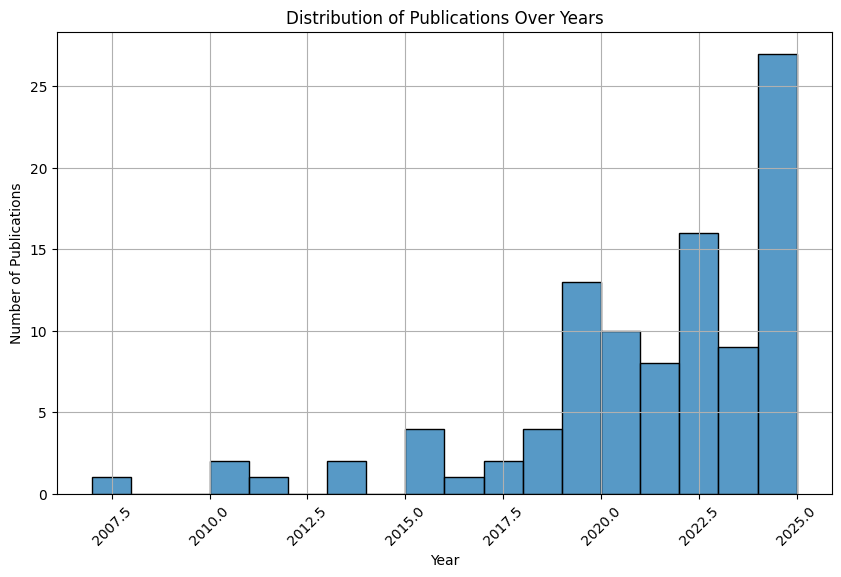

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['year'], bins=range(df['year'].min(), df['year'].max() + 1), kde=False)
plt.title('Distribution of Publications Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()